In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# This cell is here only for the second, third, ... pass through the code. 
# If we have allready genereated our data sets we can just read them instead of going through the former process again.
DATA_DIR = '../.datasets/sintetic_STS/rot_polinomials/'

train_data_in = np.load('%strain_data_in.npy' %DATA_DIR)
val_data_in = np.load('%sval_data_in.npy' %DATA_DIR)
test_data_in = np.load('%stest_data_in.npy' %DATA_DIR)

train_data_out = np.load('%strain_data_out.npy' %DATA_DIR)
val_data_out = np.load('%sval_data_out.npy' %DATA_DIR)
test_data_out = np.load('%stest_data_out.npy' %DATA_DIR)

In [3]:
import keras
from keras.models import model_from_json


Using TensorFlow backend.


In [4]:
def load_model(model_dir):
    """
    This method loads a previously traned model from model_dir.
    Parameters:
        - model_dir (string), a directory where the model and its weights are saved.
    """
    try:
        f = open('%smodel' %model_dir, 'r')
        json_string = f.read()

        model = model_from_json(json_string)
        model.load_weights('%sweights' %model_dir)
        print('Model loaded!')

        return model

    except FileNotFoundError:
        print('Could not load model!')


def save_model(model_dir, model):
    """
    This method saves the model to the model_dir directory.
    Properties:
        - model (keras.model), a trained keras model,
        - model_dir (string), the directory to save the model to.
    """
    json_string = model.to_json()

    f = open('%smodel' %model_dir, 'w+')
    f.write(json_string)
    f.close()

    model.save_weights('%sweights' %model_dir)
    print("Model saved!")

In [19]:
MODEL_DIR = 'model/rot_polinomials/model_kp_60_hn_10/'



model = load_model(MODEL_DIR)
opti = keras.optimizers.Adam(lr=0.000001, decay=0.1)
model.compile(loss='mean_squared_error', optimizer=opti)

pred = model.predict(test_data_in)

Model loaded!


In [21]:

model.fit(train_data_in, train_data_out, epochs=2, batch_size=100, validation_data=(val_data_in, val_data_out))
pred = model.predict(test_data_in)

Train on 80000 samples, validate on 10000 samples
Epoch 1/2
80000/80000 [==============================] - 133s - loss: 1.1029e-05 - val_loss: 1.6507e-06
Epoch 2/2
80000/80000 [==============================] - 139s - loss: 1.1024e-05 - val_loss: 1.6513e-06


359


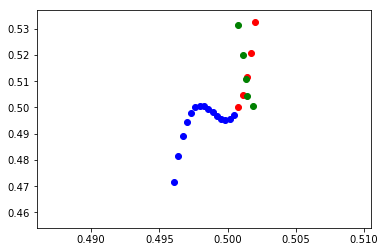

2908


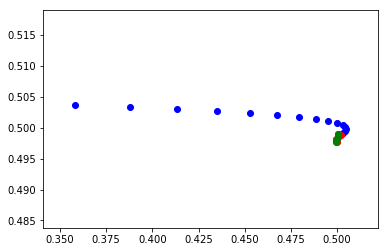

9003


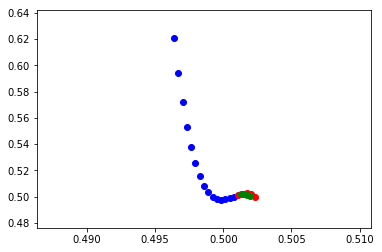

888


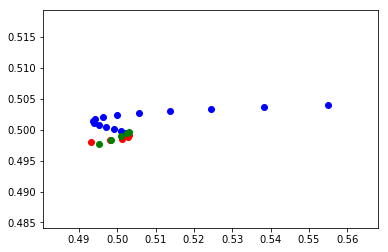

2241


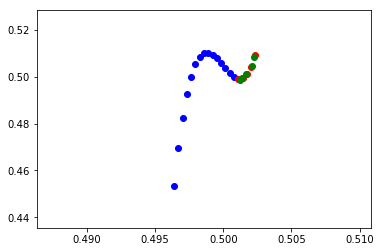

5741


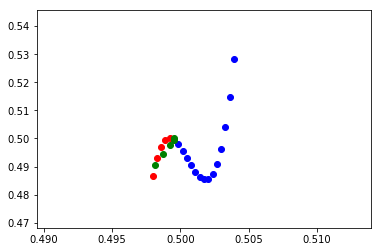

7767


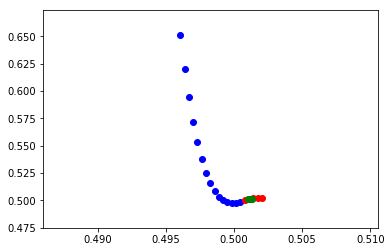

5859


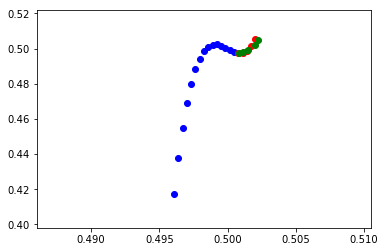

3005


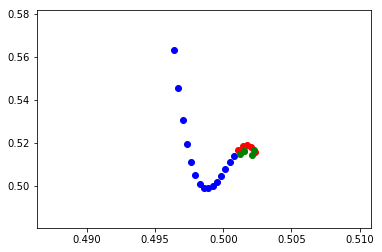

6242


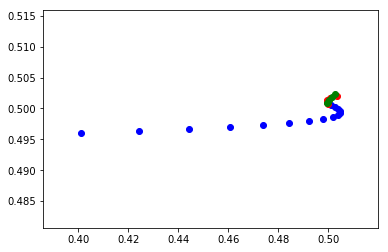

623


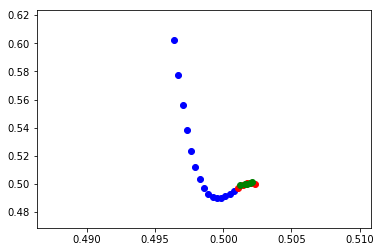

9170


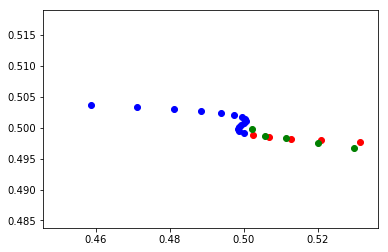

3575


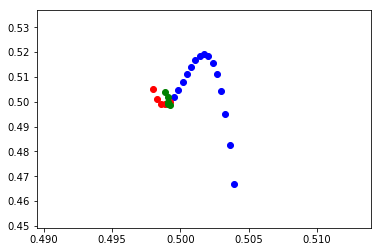

9748


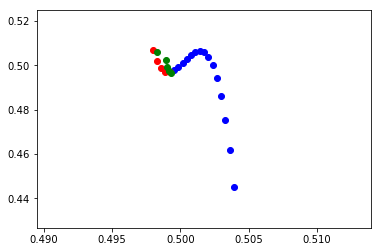

2308


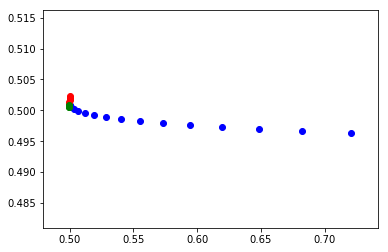

6764


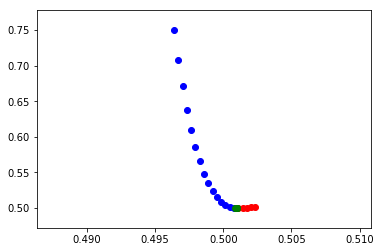

1540


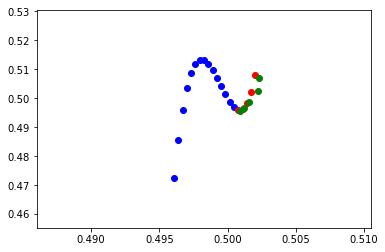

820


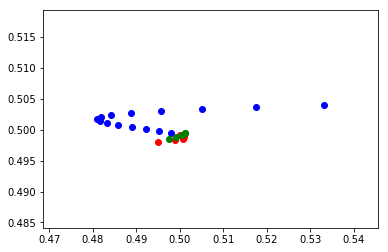

1156


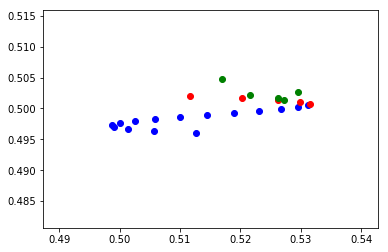

2413


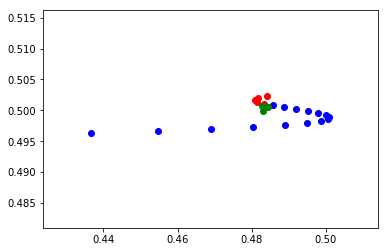

6920


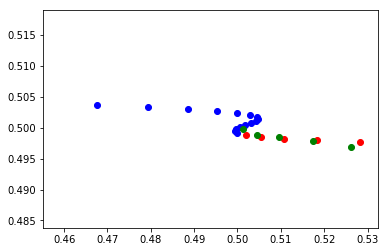

9347


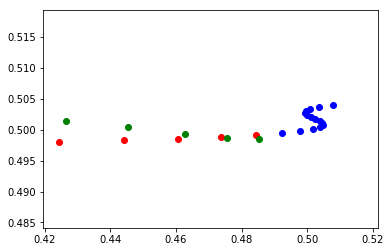

5311


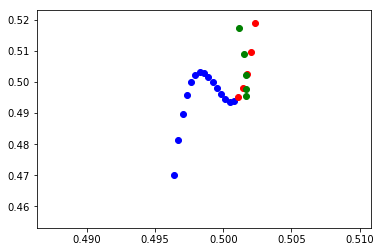

7408


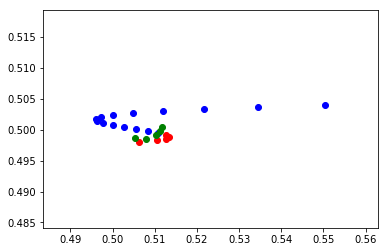

9885


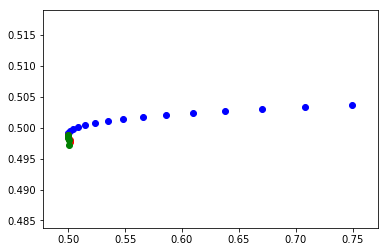

5251


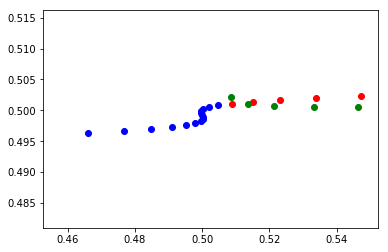

9060


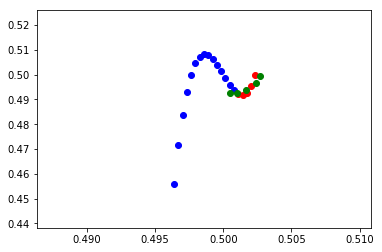

8312


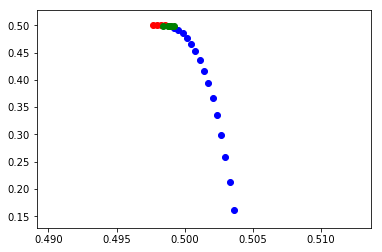

1209


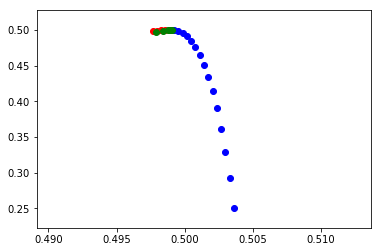

4790


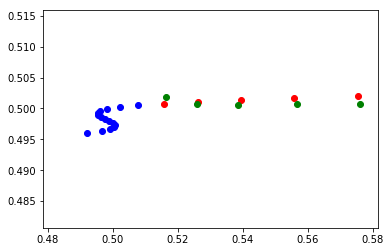

1094


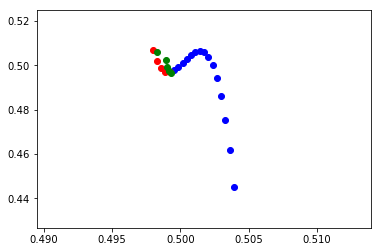

4101


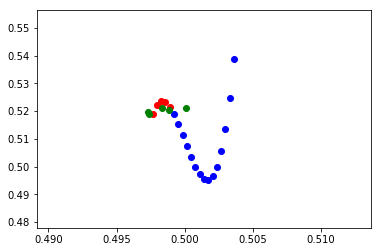

1777


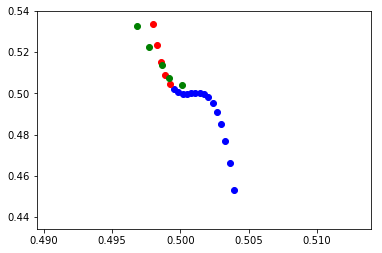

2417


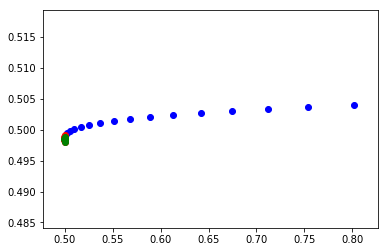

5161


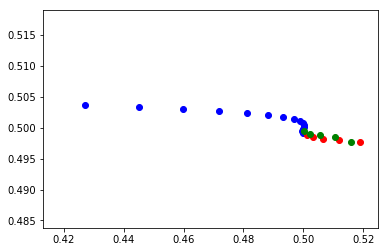

8052


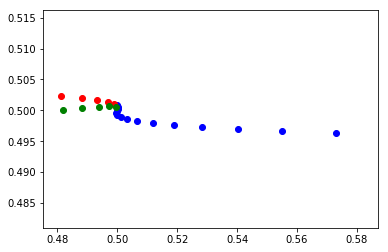

5314


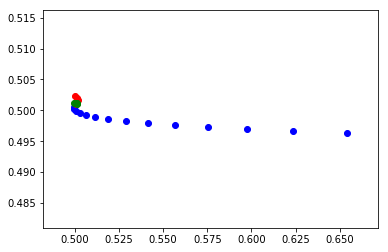

3641


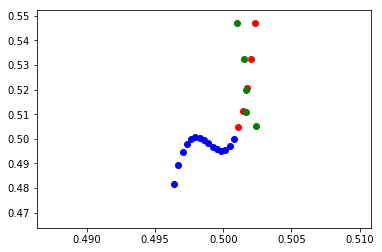

7210


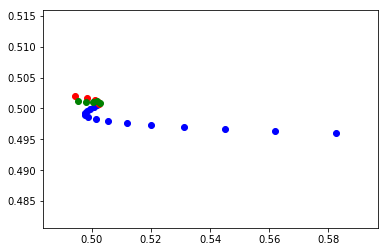

7253


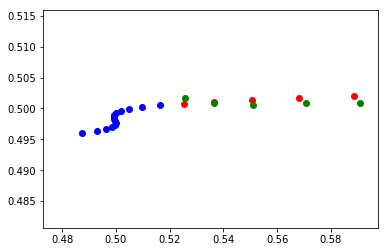

5380


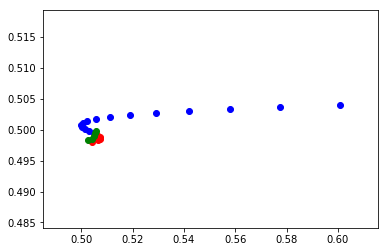

8230


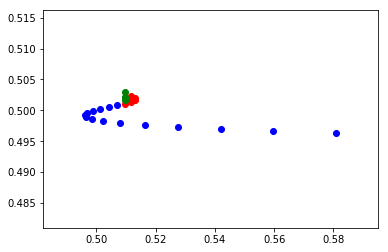

3365


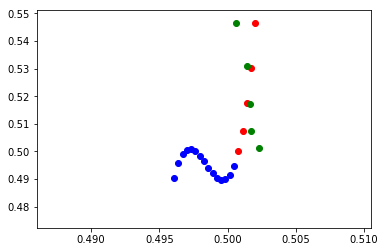

4880


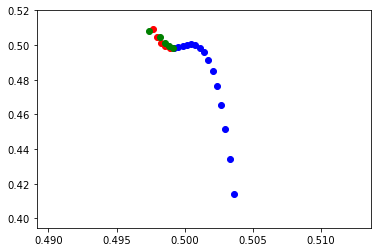

1550


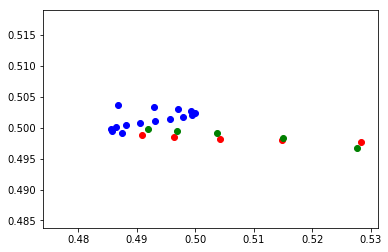

2417


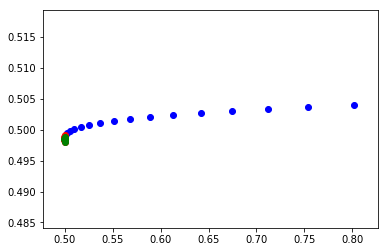

8666


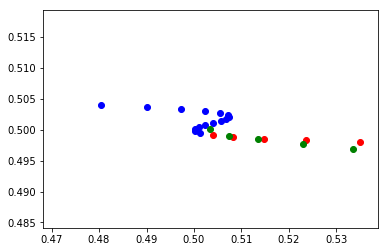

3718


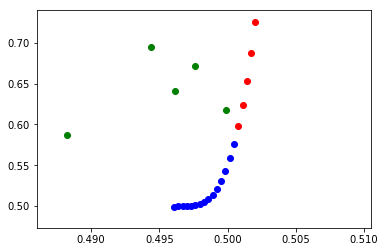

9326


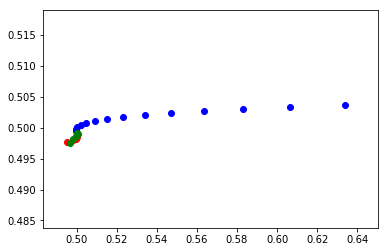

9540


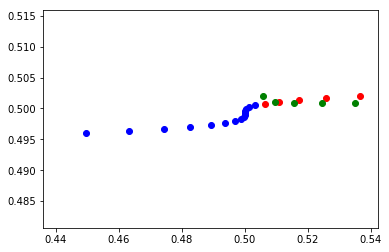

In [23]:
for _ in range(50):
    i = np.random.randint(test_data_in.shape[0])
    print(i)
    plt.scatter(test_data_in[i,:,0],test_data_in[i,:,1], color='blue')
    plt.scatter(test_data_out[i,:,0],test_data_out[i,:,1], color='red')
    plt.scatter(pred[i,:,0], pred[i,:,1], color='green')
    plt.show()

In [66]:
save_model(MODEL_DIR, model)

Model saved!
